In [1]:
import os

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.utils.data
from torchvision import datasets
from torchvision import transforms

import numpy as np

/home/jfialho/.conda/envs/ml_default/lib/python3.7/site-packages/torchvision/io/image.py:11: UserWarning: Failed to load image Python extension: libtorch_cuda_cu.so: cannot open shared object file: No such file or directory
  warn(f"Failed to load image Python extension: {e}")


In [2]:
DEVICE = torch.device("cpu")
BATCHSIZE = 128
CLASSES = 10
DIR = os.getcwd()
EPOCHS = 10
LOG_INTERVAL = 10
N_TRAIN_EXAMPLES = BATCHSIZE * 30
N_VALID_EXAMPLES = BATCHSIZE * 10

In [9]:
# hyperparameters set
optimizer_name = "Adam"
lr = 1e-5
n_layers = 1
p = 0.2
out_features = 4

In [10]:
layers = []
acc = []

# Generate the model.
in_features = 28 * 28
for i in range(n_layers):        
    layers.append(nn.Linear(in_features, out_features))
    layers.append(nn.ReLU())
    layers.append(nn.Dropout(p))
    in_features = out_features
layers.append(nn.Linear(in_features, CLASSES))
layers.append(nn.LogSoftmax(dim=1))

model =  nn.Sequential(*layers).to(DEVICE)


# Generate the optimizers.
optimizer = getattr(optim, optimizer_name)(model.parameters(), lr=lr)

# Load FashionMNIST dataset.
train_loader = torch.utils.data.DataLoader(
    datasets.FashionMNIST(DIR, train=True, download=True, transform=transforms.ToTensor()),
    batch_size=BATCHSIZE,
    shuffle=True,
)
valid_loader = torch.utils.data.DataLoader(
    datasets.FashionMNIST(DIR, train=False, transform=transforms.ToTensor()),
    batch_size=BATCHSIZE,
    shuffle=True,
)


# Training of the model.
for epoch in range(EPOCHS):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        # Limiting training data for faster epochs.
        if batch_idx * BATCHSIZE >= N_TRAIN_EXAMPLES:
            break

        data, target = data.view(data.size(0), -1).to(DEVICE), target.to(DEVICE)

        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()

    # Validation of the model.
    model.eval()
    correct = 0
    with torch.no_grad():
        for batch_idx, (data, target) in enumerate(valid_loader):
            # Limiting validation data.
            if batch_idx * BATCHSIZE >= N_VALID_EXAMPLES:
                break
            data, target = data.view(data.size(0), -1).to(DEVICE), target.to(DEVICE)
            output = model(data)
            # Get the index of the max log-probability.
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()

    accuracy = correct / min(len(valid_loader.dataset), N_VALID_EXAMPLES)
    acc.append(accuracy)

    print("epoch:",epoch,"| acc:",accuracy)
    
#print best value of acc    
print("--------------------------")
print("best acc:", np.max(acc))

epoch: 0 | acc: 0.10078125
epoch: 1 | acc: 0.1140625
epoch: 2 | acc: 0.10546875
epoch: 3 | acc: 0.1015625
epoch: 4 | acc: 0.0984375
epoch: 5 | acc: 0.09375
epoch: 6 | acc: 0.10546875
epoch: 7 | acc: 0.11875
epoch: 8 | acc: 0.11796875
epoch: 9 | acc: 0.13203125
--------------------------
best acc: 0.13203125


[]

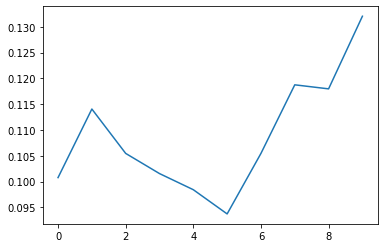

In [11]:
import matplotlib.pyplot as plt
plt.plot(acc)
plt.plot()